In [1]:
import matplotlib.pyplot as plt
import json
import os
import os.path as osp

In [2]:
def load_loss(ckpt):
    with open(osp.join(ckpt,"trainer_state.json")) as fp:
        history = json.load(fp)["log_history"]
    loss = []
    for item in history:
        if "loss" in item:
            loss.append(item["loss"])
    return loss

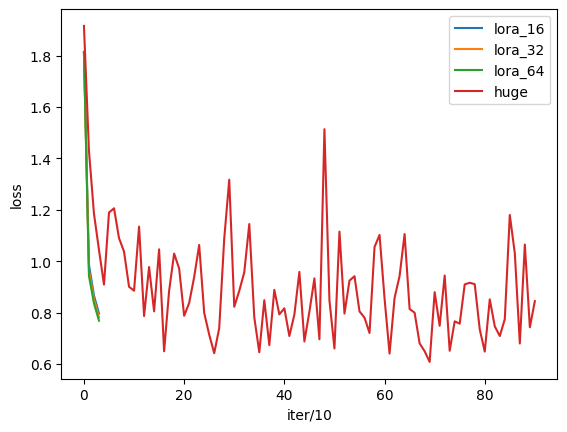

In [7]:
dic = {
    "lora_16":"/mnt/dolphinfs/hdd_pool/docker/user/hadoop-mtcv/weiziyu/Emo-Llama/outputs/aiwei_lora_16_alpha_32",
    "lora_32":"/mnt/dolphinfs/hdd_pool/docker/user/hadoop-mtcv/weiziyu/Emo-Llama/outputs/aiwei_lora_32",
    "lora_64":"/mnt/dolphinfs/hdd_pool/docker/user/hadoop-mtcv/weiziyu/Emo-Llama/outputs/aiwei_lora_64",
    "huge":"/mnt/dolphinfs/hdd_pool/docker/user/hadoop-mtcv/weiziyu/Emo-Llama/outputs/aiwei_huge"
}
legends = []
for k,v in dic.items():
    loss = load_loss(v)[::100]
    legends.append(k)
    plt.plot(loss)
plt.legend(legends)
plt.ylabel("loss")
plt.xlabel("iter/10")

plt.show()
